In [1]:
#!/usr/bin/env python3

# read text files and plot them

import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy import signal, fftpack
from scipy.signal import savgol_filter


##Just to test


file = np.loadtxt("data_file_03-11-19_01-04-52" ,skiprows=1)
#print(file)
q = file[1::,1:5]
q_hat = file[1::,5:9]
avel = file[1::,9:12]
avel_hat = file[1::,12:15]
aaccel = file[1::,15:18]
aaccel_hat = file[1::,18:21]

time = np.arange(np.size(q[:,0]))
time = time/1000

avel[:,0] *= 2*np.pi /360
avel[:,1] *= 2*np.pi /360
avel[:,2] *= 2*np.pi /360

#TUM colors rgb
blue = (0,0.3961,0.7412)
red = (0.7686,0.0275,0.1059)
green =(0,0.4863,0.1882)
orange =  (0.8902, 0.4471, 0.1333)
purple = (0.4118, 0.0314, 0.3529)
grey = (0.6118, 0.6157, 0.6235)
yellow = (0.9765, 0.7294, 0)

avel_gradient_x = np.gradient(avel[:,0])
avel_gradient_y = np.gradient(avel[:,1])
avel_gradient_z = np.gradient(avel[:,2])

def filter_signal_SG(data, window_length, polyorder, deriv):
    filtered_data = savgol_filter(data, window_length, polyorder, deriv)
    return filtered_data

avel_savgol_x = filter_signal_SG(avel[:,0],351,7,0)
avel_savgol_y = filter_signal_SG(avel[:,1],351,7,0)
avel_savgol_z = filter_signal_SG(avel[:,2],351,7,0)

avel_dot_savgol_x = filter_signal_SG(avel_savgol_x,51,7,0)
avel_dot_savgol_y = filter_signal_SG(avel_savgol_y,51,7,0)
avel_dot_savgol_z = filter_signal_SG(avel_savgol_z,51,7,0)



def PlotNoLimOne(time, F_x1, F_y1, F_z1, label_name_x1,label_name_y1, label_name_z1, axis_label_x, axis_label_y,title, savename):
	plt.figure(figsize=(9,9))
	plt.plot(time, F_x1, c=blue, label = label_name_x1)
	plt.plot(time, F_y1, c=red, label = label_name_y1)
	plt.plot(time, F_z1, c=green, label = label_name_z1)
	plt.xlabel(axis_label_x)
	plt.ylabel(axis_label_y)
	plt.xlim(xmin=0)
	plt.title(title)
	plt.legend()
	plt.savefig(savename)
    
def PlotCompare(counter, time, x_1, x_2, y_1, y_2, z_1, z_2, title_1, title_2, title_3, label_1, label_2, ylabel, title, savename):
	plt.figure(counter, figsize=(8,9))
	plt.title(title)
	plt.subplot(311)
	plt.tight_layout()
	plt.plot(time, x_1, c=blue, label= label_1)
	plt.plot(time, x_2, c=red, label= label_2)
	plt.title(title_1)
	plt.legend()
	plt.xlabel("Elapsed time in s")
	plt.ylabel(ylabel)
	plt.subplot(312)
	plt.tight_layout()
	plt.plot(time, y_1, c=blue, label= label_1)
	plt.plot(time, y_2, c=red, label= label_2)
	plt.ylabel(ylabel)
	plt.title(title_2)
	plt.legend()
	plt.xlabel("Elapsed time in s")
	plt.subplot(313)
	plt.tight_layout()
	plt.plot(time, z_1, c=blue, label= label_1)
	plt.plot(time, z_2, c=red, label= label_2)
	plt.ylabel(ylabel)
	plt.xlabel("Elapsed time in s")
	plt.title(title_3)
	plt.legend()
	plt.savefig(savename)

PlotCompare(1,time, avel[:,0],avel_hat[:,0],avel[:,1], avel_hat[:,1],avel[:,2], avel_hat[:,2], "avel_x","avel_y", "avel_z", "Sensor signal", "Kalman Filter", "Angular velocity in rad/s", "Compare sensor data with ekf","avel_ekf.png")
PlotNoLimOne(time, aaccel_hat[:,0],aaccel_hat[:,1],aaccel_hat[:,2], "aaccel_hat_x","aaccel_hat_y", "aaccel_hat_z", "Elapsed time in s", "Angular acceleration in rad/s^2", "Angular acceleration Extended Kalman filter", "aaccel_ekf.png")
PlotCompare(3,time, aaccel_hat[:,0],avel_dot_savgol_x, aaccel_hat[:,1],avel_dot_savgol_y, aaccel_hat[:,2],avel_dot_savgol_z, "aaccel_x","aaccel_y", "aaccel_z", "Extended Kalman Filter", "Savitzky Golay Filter", "Angular acceleration in rad/s^2", "Compare offline derivative with ekf","aaccel_ekf_sg.png")
PlotNoLimOne(time, avel_hat[:,0],avel_hat[:,1],avel_hat[:,2], "avel_hat_x","avel_hat_y", "avel_hat_z", "Elapsed time in s", "Angular velocity in rad/s", "Angular velocity Extended Kalman filter", "avel_ekf.png")



/home/elenakern/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


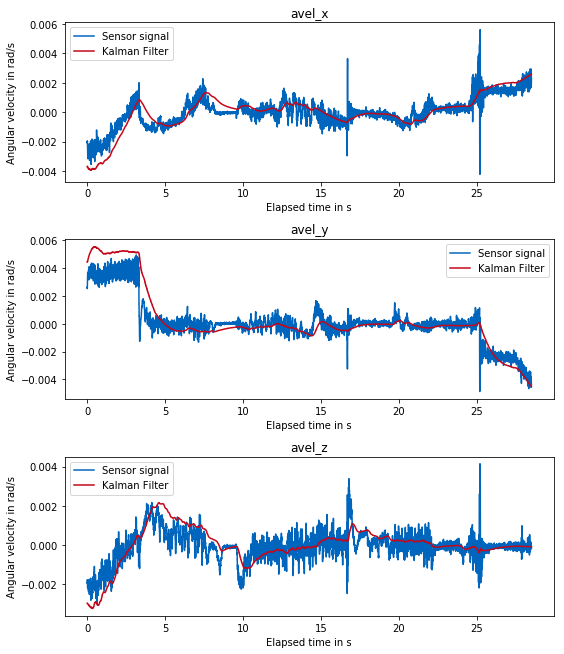

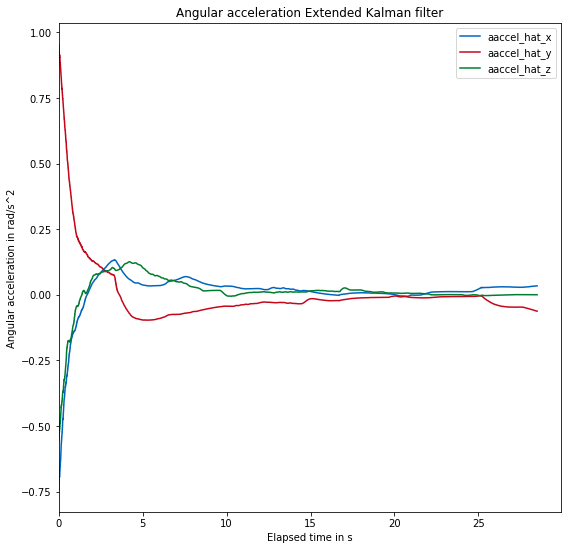

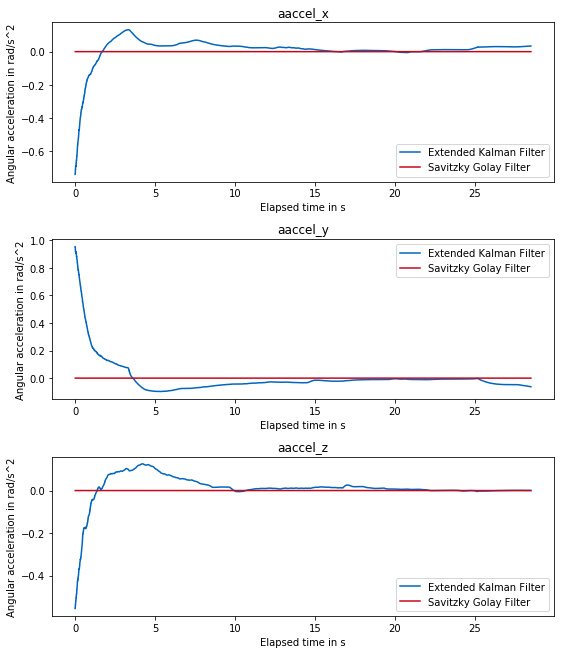

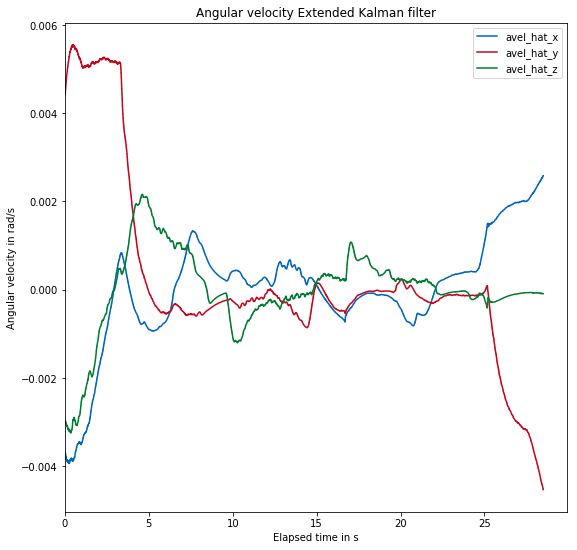

In [17]:
file = np.loadtxt("data_file_03-11-19_02-36-16" ,skiprows=1)
#print(file)
q = file[1::,1:5]
q_hat = file[1::,5:9]
avel = file[1::,9:12]
avel_hat = file[1::,12:15]
aaccel = file[1::,15:18]
aaccel_hat = file[1::,18:21]

time = np.arange(np.size(q[:,0]))
time = time/1000

avel[:,0] *= 2*np.pi /360
avel[:,1] *= 2*np.pi /360
avel[:,2] *= 2*np.pi /360

avel_hat[:,0] *= 2*np.pi /360
avel_hat[:,1] *= 2*np.pi /360
avel_hat[:,2] *= 2*np.pi /360

avel_gradient_x = np.gradient(avel[:,0])
avel_gradient_y = np.gradient(avel[:,1])
avel_gradient_z = np.gradient(avel[:,2])

def filter_signal_SG(data, window_length, polyorder, deriv):
    filtered_data = savgol_filter(data, window_length, polyorder, deriv)
    return filtered_data

avel_savgol_x = filter_signal_SG(avel[:,0],351,7,0)
avel_savgol_y = filter_signal_SG(avel[:,1],351,7,0)
avel_savgol_z = filter_signal_SG(avel[:,2],351,7,0)

avel_dot_savgol_x = filter_signal_SG(avel[:,0],171,5,1)
avel_dot_savgol_y = filter_signal_SG(avel[:,1],171,5,1)
avel_dot_savgol_z = filter_signal_SG(avel[:,2],171,5,1)

PlotCompare(1,time, avel[:,0],avel_hat[:,0],avel[:,1], avel_hat[:,1],avel[:,2], avel_hat[:,2], "avel_x","avel_y", "avel_z", "Sensor signal", "Kalman Filter", "Angular velocity in rad/s", "Compare sensor data with ekf","avel_ekf_compare.png")
PlotNoLimOne(time, aaccel_hat[:,0],aaccel_hat[:,1],aaccel_hat[:,2], "aaccel_hat_x","aaccel_hat_y", "aaccel_hat_z", "Elapsed time in s", "Angular acceleration in rad/s^2", "Angular acceleration Extended Kalman filter", "aaccel_ekf.png")
PlotCompare(3,time, aaccel_hat[:,0],avel_dot_savgol_x, aaccel_hat[:,1],avel_dot_savgol_y, aaccel_hat[:,2],avel_dot_savgol_z, "aaccel_x","aaccel_y", "aaccel_z", "Extended Kalman Filter", "Savitzky Golay Filter", "Angular acceleration in rad/s^2", "Compare offline derivative with ekf","aaccel_ekf_sg.png")
PlotNoLimOne(time, avel_hat[:,0],avel_hat[:,1],avel_hat[:,2], "avel_hat_x","avel_hat_y", "avel_hat_z", "Elapsed time in s", "Angular velocity in rad/s", "Angular velocity Extended Kalman filter", "avel_ekf.png")

